**Crop images Augmentation**

This Code adds the functionality of Data augmentation by cropping images in 1x1 and 2x1 in horizontal form.

In [19]:
# Augmentator Hcrop 1x1 and 2x1

import numpy as np
import matplotlib.pyplot as plt
from numpy import load
import gc
import cv2
import pandas as pd


#========== Neural NW
import tensorflow as tf

print("Libraries Loaded")

Libraries Loaded


In [20]:
dict_Validation = load('../input/processed-total-dataset/Processed_Val.npz')
Val = dict_Validation['arr_0']
Val = Val[:,:,:,0]
#Scale Validation data between 0 and 1, Others were already scaled.
Val = (Val - np.min(Val)) / (np.max(Val) - np.min(Val)).astype(np.float32)
del dict_Validation

def Data_Loader(Batch_number):
    path ='../input/processed-batches/Batch' + str(Batch_number) 
    dict_Batch_X = load(path + '_X.npz')
    dict_Batch_Y = load(path + '_Y.npz')
    Xa = dict_Batch_X['arr_0']
    Ya = dict_Batch_Y['arr_0']
    print("Batch"+ str(Batch_number)+":", "Training Data Dim", Xa.shape,"  Label Data Dim:", Ya.shape)
    del dict_Batch_X
    del dict_Batch_Y
    return Xa, Ya

Test_Batch = 2


X_TEST, Y_TEST =  Data_Loader(Test_Batch)
X_TEST = X_TEST[:,:,:,0]  #single channel mode


X, Y = Data_Loader(1)

X = X[:,:,:,0]  #single channel mode
Y=Y.astype(np.int16)
#X=X.astype(np.float16)
print("(X_TEST) Test Dataset's Dimensions:" ,X_TEST.shape,"label Dim: ", Y_TEST.shape)
print("(X)      Training Dataset's Dimensions:" ,X.shape,"label Dim: ", Y.shape)
print()
Y=tf.one_hot(Y, 1000)
gc.collect()

Batch2: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Batch1: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
(X_TEST) Test Dataset's Dimensions: (100000, 8, 8) label Dim:  (100000,)
(X)      Training Dataset's Dimensions: (100000, 8, 8) label Dim:  (100000,)



216

**Sample Image Plots**

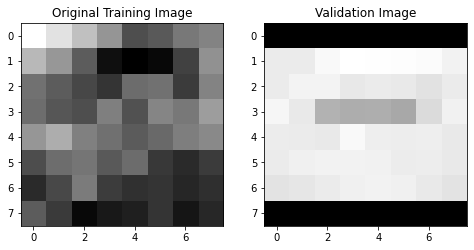

In [21]:
tst_img=X[0]
val_img=Val[0]
tst_bat=X[:10]

fig, axs = plt.subplots(1, 2,figsize=(8, 8))
axs[0].set_title('Original Training Image')
axs[0].imshow(tst_img, cmap='gray')
axs[1].set_title('Validation Image')
axs[1].imshow(val_img, cmap='gray')

**level1- 1x1, level2- 1x1,2x1, Append will add original dataset as well.**

At level 1, The returned array will have 1x1 cropped images, and original images (if append is true). Lables will also be returned.

At level 2, The returned array will have 1x1 cropped images, 2x1 cropped images, original images (if append is true). Lables will also be returned.

In [22]:
def Augmentator(Image_Batch, Label=0, crop_level=1, Append=True):

    template_h_1x1 = np.array([[0,0,0,0,0,0,0,0], [1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1], 
                               [1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1],
                               [1,1,1,1,1,1,1,1], [0,0,0,0,0,0,0,0]]).astype('uint8')
    
    template_h_2x1 = np.array([[0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], [1,1,1,1,1,1,1,1], 
                               [1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1], [1,1,1,1,1,1,1,1],
                               [1,1,1,1,1,1,1,1], [0,0,0,0,0,0,0,0]]).astype('uint8')
    
    y = Label

    if Append==True:
        if not isinstance(y, (list, tuple, np.ndarray,tf.Tensor)): #y==0:  #No labels, only data augment

            New_Batch = np.multiply(Image_Batch,template_h_1x1)
            New_Batch = np.concatenate( (Image_Batch,New_Batch), axis=0 )
        
            if crop_level==2:
                New_Batch2 = np.multiply(Image_Batch,template_h_2x1)
                New_Batch = np.concatenate( (New_Batch,New_Batch2), axis=0 )

            return New_Batch
        
        else: #labels array present:
            
            New_Batch = np.multiply(Image_Batch,template_h_1x1)
            New_Batch = np.concatenate( (Image_Batch,New_Batch), axis=0 )
            
            New_Label = np.concatenate( (y,y), axis=0 )  #Repeat labels for all new images
        
            if crop_level==2:
                New_Batch2 = np.multiply(Image_Batch,template_h_2x1)
                New_Batch = np.concatenate( (New_Batch,New_Batch2), axis=0 )
                New_Label = np.concatenate( (New_Label,y), axis=0 )  #Repeat labels for all new images

            return New_Batch, New_Label
            
    else: #Append is False here,
        if crop_level==2 and (isinstance(y, (list, tuple, np.ndarray,tf.Tensor))): #Y!=0:
            New_Batch2 = np.multiply(Image_Batch,template_h_2x1)  #2x1 imgs
            
            Image_Batch = np.multiply(Image_Batch,template_h_1x1)  #1x1 imgs
            New_Batch2 = np.concatenate( (Image_Batch,New_Batch2), axis=0 ) #1x1 and 2x1 imgs appended
            New_Label2 = np.concatenate( (y,y), axis=0 )  #Repeat labels for all new images
            
            return New_Batch2, New_Label2
        
        else:  #if only replace and no append
            Image_Batch = np.multiply(Image_Batch,template_h_1x1)
            return Image_Batch


In [24]:
print("Original X's Shape:",X.shape)
print()
Xaug = Augmentator(X, Label=0, crop_level=1, Append=False) #level1- 1x1, level2- 1x1,2x1, Append will add original dataset as well.
print("(Overwrite X's data) level-1 and append-False Shape:",Xaug.shape)
print()

Xaug, Yaug = Augmentator(X, Label=Y, crop_level=1, Append=True) #level1- 1x1, level2- 1x1,2x1, Append will add original dataset as well.
print("(Overwrite X's data) level-1 and append-False Shape:",Xaug.shape)
print("(Overwrite Y's data) level-1 and append-False Shape:",Yaug.shape)
print()

Xaug[-1]  #Show last item in array

Original X's Shape: (100000, 8, 8)

(Overwrite X's data) level-1 and append-False Shape: (100000, 8, 8)

(Overwrite X's data) level-1 and append-False Shape: (200000, 8, 8)
(Overwrite Y's data) level-1 and append-False Shape: (200000, 1000)



array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.5176471 , 0.52156866, 0.5568628 , 0.43137255, 0.35686275,
        0.5294118 , 0.5176471 , 0.5137255 ],
       [0.50980395, 0.57254905, 0.28627452, 0.21568628, 0.47843137,
        0.53333336, 0.5176471 , 0.5176471 ],
       [0.5019608 , 0.39607844, 0.18431373, 0.47843137, 0.5882353 ,
        0.52156866, 0.52156866, 0.52156866],
       [0.5803922 , 0.35686275, 0.08235294, 0.5058824 , 0.5372549 ,
        0.49803922, 0.52156866, 0.52156866],
       [0.54901963, 0.42352942, 0.39607844, 0.5647059 , 0.5254902 ,
        0.5254902 , 0.5254902 , 0.5254902 ],
       [0.5254902 , 0.54901963, 0.5647059 , 0.5254902 , 0.5254902 ,
        0.5254902 , 0.5254902 , 0.5254902 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]], dtype=float32)